In [1]:
import dynamoon as dm
import matplotlib.pyplot as plt

In [15]:
star = dm.star(1, 1, [0.5, 0.5])
planet = dm.rock(1, 1)
moon = dm.rock(0.1, 0.1)

In [26]:
t = np.linspace(0, 200, 1000000)
sys = dm.system(star, planet, moon)
sys.set_planet_orbit(t0=4, e=0.2, P=100, Omega=180, w=180, i=90)
sys.set_moon_orbit(t0=0.25, e=0.1, P=1, Omega=80, w=0, i=87)

CPU times: user 616 ms, sys: 38.5 ms, total: 654 ms
Wall time: 677 ms


(3.0, 5.0)

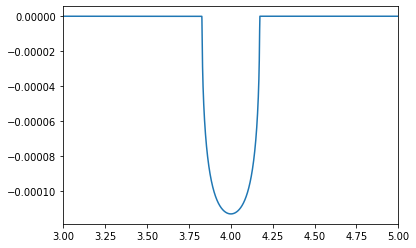

In [27]:
%time flux = sys.flux(t)
plt.plot(t, flux, '-')
plt.xlim(3, 5)

In [ ]:
from IPython.display import HTML

stkwargs = {"fill": True, "color":"#ffbb4d"}
plkwargs = {"fill": True, "color":"k", "alpha":1}
mokwargs = {"fill": True, "color":"k", "alpha":1}

animation = sys.animate(np.linspace(3.97, 4.03, 500), 
                        stkwargs=stkwargs, 
                        plkwargs=plkwargs, 
                        mokwargs=mokwargs)

HTML(animation.to_html5_video())

In [28]:
import batman
from astropy import constants as ac

params = batman.TransitParams()
params.t0 = 4                       
params.per = 100                      
params.rp = 1 / sys.star.radius                    
params.a = sys.starplanet.a * ac.au.value / (sys.star.radius * ac.R_earth.value)
params.inc = 90                     
params.ecc = 0.2                     
params.w = 180                       
params.u = [0.5, 0.5]                
params.limb_dark = "quadratic"       

In [29]:
%time m = batman.TransitModel(params, t)    
%time flux_batman = m.light_curve(params)          

CPU times: user 283 ms, sys: 3.23 ms, total: 286 ms
Wall time: 293 ms
CPU times: user 7.47 ms, sys: 2.95 ms, total: 10.4 ms
Wall time: 10.5 ms


(3.0, 5.0)

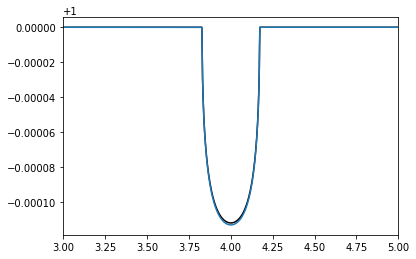

In [30]:
plt.plot(t, flux_batman, color='k')
plt.plot(t, flux+1)
plt.xlim(3, 5)

(-2.0, 1.0)

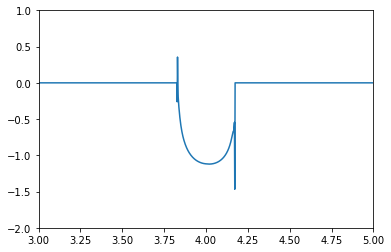

In [25]:
plt.plot(t, ((flux+1) - flux_batman)*1e6)
plt.xlim(3, 5)
plt.ylim(-2, 1)

In [ ]:
plt.plot(flux_batman)